In [1]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics

In [2]:
# ignoring warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# setting the option to display all the columns
pd.set_option('display.max_columns',None)

# 1. Reading & Understanding the Data

In [4]:
leads=pd.read_csv("Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# Shape of the leads data set
leads.shape

(9240, 37)

In [6]:
# checking the basic info of the data set
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
# Basic Stats of the leads data set
round(leads.describe(percentiles=[0.75,0.9,0.95,0.98,0.99]).T,0)

,count,mean,std,min,50%,75%,90%,95%,98%,99%,max
Lead Number,9240.0,617188.0,23406.0,579533.0,615479.0,637387.0,650506.0,655404.0,658599.0,659593.0,660737.0
Converted,9240.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
TotalVisits,9103.0,3.0,5.0,0.0,3.0,5.0,7.0,10.0,13.0,17.0,251.0
Total Time Spent on Website,9240.0,488.0,548.0,0.0,248.0,936.0,1380.0,1562.0,1734.0,1841.0,2272.0
Page Views Per Visit,9103.0,2.0,2.0,0.0,2.0,3.0,5.0,6.0,8.0,9.0,55.0
Asymmetrique Activity Score,5022.0,14.0,1.0,7.0,14.0,15.0,16.0,17.0,17.0,17.0,18.0
Asymmetrique Profile Score,5022.0,16.0,2.0,11.0,16.0,18.0,19.0,20.0,20.0,20.0,20.0


- from the above table we can conclude the data set passes the sanity check
- There appears outliers are present in the "TotalVisits" & "Page Views Per Visit" features, which will be dealt in the next step.

# 2. Data Cleaning

### a) Dealing with Missing values

#### Missing values in numerical columns

In [8]:
round(leads.select_dtypes(np.number).isnull().sum()/leads.select_dtypes(np.number).shape[0],3)

Lead Number                    0.000
Converted                      0.000
TotalVisits                    0.015
Total Time Spent on Website    0.000
Page Views Per Visit           0.015
Asymmetrique Activity Score    0.456
Asymmetrique Profile Score     0.456
dtype: float64

- Missing values in 'TotalVisits' & 'Page Views Per Visit' are imputed with median value
-  'Asymmetrique Activity Score', 'Asymmetrique Profile Score' have over 45% missing values and are dropped 

In [9]:
leads['TotalVisits'] = leads['TotalVisits'].replace(np.NaN,leads['TotalVisits'].median())
leads['Page Views Per Visit'] = leads['Page Views Per Visit'].replace(np.NaN,leads['Page Views Per Visit'].median())

In [10]:
leads=leads.drop(['Asymmetrique Activity Score', 'Asymmetrique Profile Score'],axis=1)

In [11]:
# checking for duplicates in Lead Number
leads['Lead Number'].duplicated().sum()

0

#### Converted

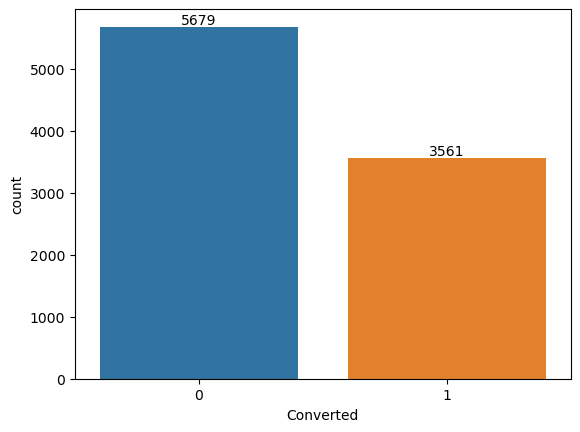

In [12]:
ax=sns.countplot(data=leads,x='Converted')
ax.bar_label(ax.containers[0])
plt.show()

- The above count plot show the leads data set is a balanced data set

#### Value Counts and "NaN" value of each categorical feature in the data set

In [13]:
for ind,i in enumerate(leads.select_dtypes(object).columns):
    print('{0}. {1} (weights)'.format(ind+1,i))
    print(leads[i].value_counts(normalize=True,dropna=False))
    print('\n')

1. Prospect ID (weights)
7927b2df-8bba-4d29-b9a2-b6e0beafe620    0.000108
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    0.000108
46befc49-253a-419b-abea-2fd978d2e2b1    0.000108
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    0.000108
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    0.000108
                                          ...   
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    0.000108
644099a2-3da4-4d23-9546-7676340a372b    0.000108
2a093175-415b-4321-9e69-ed8d9df65a3c    0.000108
c66249a3-8500-4c66-a511-312d914573de    0.000108
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    0.000108
Name: Prospect ID, Length: 9240, dtype: float64


2. Lead Origin (weights)
Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64


3. Lead Source (weights)
Google               0.310390
Direct Traffic       0.275216
Olark Chat           0.189935
Organic Search       0.124892


#### creating a function to create a list of classes of a feature less than 1% count

In [14]:
def feature_classes(feature):
    less_than_5_bool=leads[feature].value_counts(normalize=True)<0.01
    return list(less_than_5_bool[less_than_5_bool==True].index)

#### 1. checking for duplicates in Prospect ID

In [15]:
leads['Prospect ID'].duplicated().sum()

0

#### 2. & 3. Lead Origin & Lead Source
- grouping all the classes with less than 1% count
- renaming 'google' class as 'Google'
- replacing NaN values in 'Lead Source' with mode value

In [16]:
leads['Lead Origin'] = leads['Lead Origin'].replace(feature_classes('Lead Origin'),'other')
leads['Lead Source'] = leads['Lead Source'].replace(feature_classes('Lead Source'),'other')
leads['Lead Source'] = leads['Lead Source'].replace('google','Google')
leads['Lead Source'] = leads['Lead Source'].replace(np.NaN,leads['Lead Source'].mode()[0])


#### 4. & 5. Do Not Email & Do Not Call
- These features contain highly imbalanced classes, so they are dropped

In [17]:
leads=leads.drop(['Do Not Email', 'Do Not Call'],axis=1)

In [18]:
# coversion rate of the leads data set in %
round(leads.Converted.mean()*100,2)

38.54

#### 6. Last Activity 
- grouping all the classes with less than 1% count
- NaN values are imputed with mode value

In [19]:
leads['Last Activity'] = leads['Last Activity'].replace(feature_classes('Last Activity'),'other')
leads['Last Activity'] = leads['Last Activity'].replace(np.NaN,leads['Last Activity'].mode()[0])

#### 7. Country
- It has the class 'India' with 70% weightage and NaN 26%, so it doesn't offer any valuable insight and is dropped

In [20]:
leads=leads.drop(['Country'],axis=1)

#### 8. Specialization
- 'Select' class means option not selected while filling the form, so treated as NaN
- Eventhough 'Specialization' has around 36% null values, it could still offer interesting insight about the customer's previous industry of work, so this feature is not dropped now. 'Select' class & NaN values are replaced with 'Missing' class
- grouping all the classes with less than 1% count

In [21]:
leads['Specialization'] = leads['Specialization'].replace(np.NaN,'Missing')
leads['Specialization'] = leads['Specialization'].replace('Select','Missing')
leads['Specialization'] = leads['Specialization'].replace(feature_classes('Specialization'),'other')

#### 9. How did you hear about X Education
- 'Select' class means option not selected while filling the form, so treated as NaN
- 'Select' class & NaN values make up around 77%  feature, so this is dropped

In [22]:
leads=leads.drop(['How did you hear about X Education'],axis=1)

#### 10. & 11. What is your current occupation & What matters most to you in choosing a course
- 'What matters most to you in choosing a course' has close to 30% null values and remaing classes are higly imbalanced, so this feature is dropped.
- NaN values in 'What is your current occupation' are replaced with 'Missing' class
- grouping all the classes with less than 1% count

In [23]:
leads['What is your current occupation'] = leads['What is your current occupation'].replace(feature_classes('What is your current occupation'),'other')
leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.NaN,'Missing')
leads=leads.drop(['What matters most to you in choosing a course'],axis=1)

####  12. to 19.
- all these featues are highly imbalanced, so they are dropped

In [24]:
leads=leads.drop(['Search', 'Magazine','Newspaper Article', 'X Education Forums', 'Newspaper',
                'Digital Advertisement','Through Recommendations',
                'Receive More Updates About Our Courses'],axis=1)

#### 20.Tags
- it contains around 36% null values, and could lead to bias in the final model, so this feature is dropped.

In [25]:
leads=leads.drop(['Tags'],axis=1)

#### 21. to 24.
- 'Lead Quality' has more than 50% null values, so it is dropped
- 'Update me on Supply Chain Content' and 'Get updates on DM Content' have highly imbalanced classes and are dropped
- 'Select' class means option not selected while filling the form, so treated as NaN
- 'Select' class & NaN values make up around 70% of 'Lead Profile', so this also dropped

In [26]:
leads=leads.drop(['Lead Quality','Update me on Supply Chain Content', 
                                'Get updates on DM Content','Lead Profile'],axis=1)

#### 25. City
- 'Select' class means option not selected while filling the form, so treated as NaN
- 'City' feature has close to 40% null values and is dropped

In [27]:
leads=leads.drop(['City'],axis=1)

#### 26. to 28.
- 'Asymmetrique Activity Index', 'Asymmetrique Profile Index' have over 45% missing values and are dropped 
-  'I agree to pay the amount through cheque' has highly imbalanced class and is dropped

In [28]:
leads=leads.drop(['Asymmetrique Activity Index','Asymmetrique Profile Index',
       'I agree to pay the amount through cheque'],axis=1)

#### 30. Last Notable Activity
- grouping all the classes with less than 1% count

In [29]:
leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(feature_classes('Last Notable Activity'),'other')

In [30]:
# NaN check
leads.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

### b) Dealing with Outliers

1 - TotalVisits


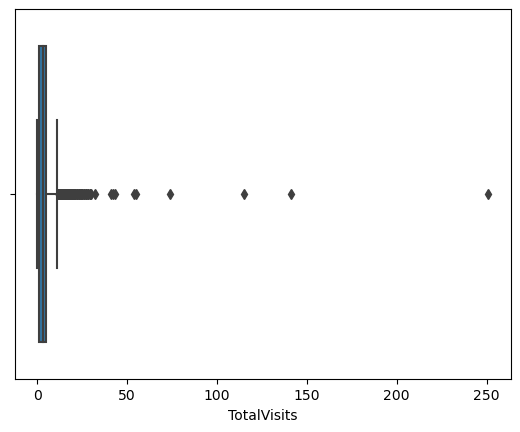



2 - Total Time Spent on Website


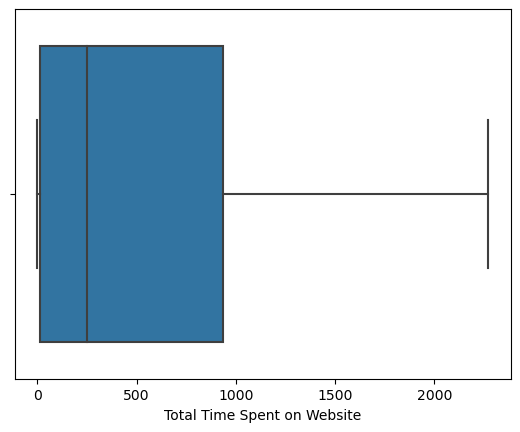



3 - Page Views Per Visit


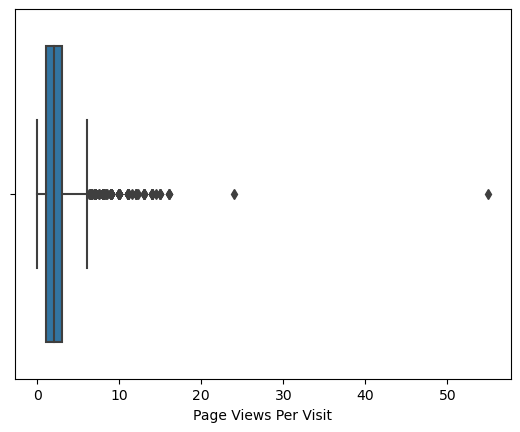

In [31]:
num_cols=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
for ind,i in enumerate(num_cols):
    print('{0} - {1}'.format(ind+1,i))
    sns.boxplot(x=i,data=leads)
    plt.show()
    print('\n')

- Ouliers in 'TotalVisits' & 'Page Views Per Visit' are capped by the following method

In [32]:
# outlier treatment for 'TotalVisits'
Q1 = leads.TotalVisits.quantile(0.01)
Q3 = leads.TotalVisits.quantile(0.99)
leads = leads[(leads.TotalVisits >= Q1) & (leads.TotalVisits <= Q3)]
# outlier treatment for 'Page Views Per Visit'
Q1 = leads['Page Views Per Visit'].quantile(0.01)
Q3 = leads['Page Views Per Visit'].quantile(0.99)
leads = leads[(leads['Page Views Per Visit'] >= Q1) & (leads['Page Views Per Visit'] <= Q3)]

In [33]:
# stats of the numerical features
leads[num_cols].describe(percentiles=[0.75,0.9,0.95,0.98,0.99]).T

,count,mean,std,min,50%,75%,90%,95%,98%,99%,max
TotalVisits,9090.0,3.140924,2.881884,0.0,3.0,4.0,7.0,9.0,11.00,13.00,17.0
Total Time Spent on Website,9090.0,484.243784,547.243973,0.0,246.0,930.0,1378.0,1558.0,1734.22,1840.11,2272.0
Page Views Per Visit,9090.0,2.262836,1.881164,0.0,2.0,3.0,5.0,6.0,7.00,8.00,9.0


# 3. EDA

### a) Numerical Features

1. TotalVisits


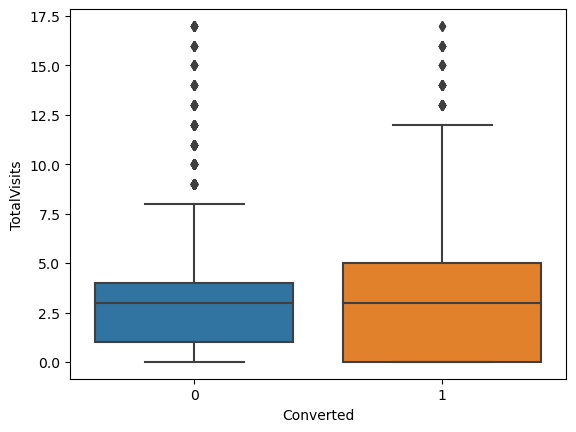



2. Total Time Spent on Website


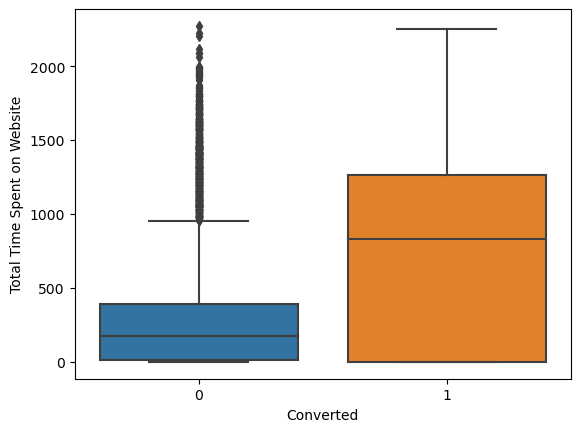



3. Page Views Per Visit


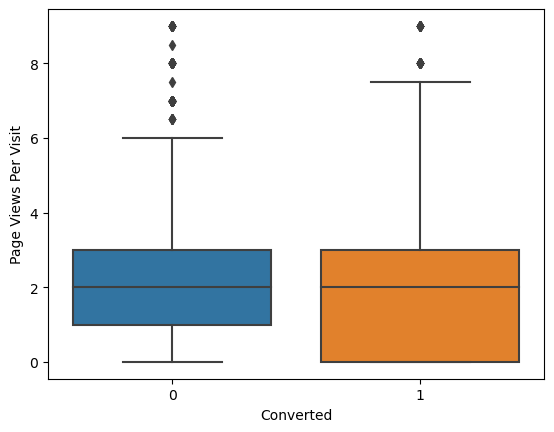

In [34]:
for ind,i in enumerate(num_cols):
    print('{0}. {1}'.format(ind+1,i))
    sns.boxplot(data=leads,x='Converted',y=i)
    plt.show()
    print('\n')

- plot 1 'Total Time Spent on Website' show, for the leads that are converted time spent on the website is clearly high, with median value close to 1000 units of time spent on the website.
- plots 1 and 3 show for the leads that are converted, upper whisker is clearly higher than those leads that are not converted. 

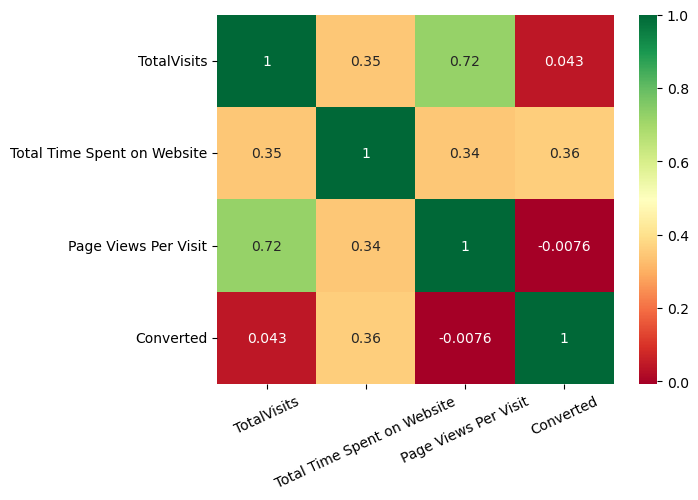

In [35]:
# Heat map of the numerical features
sns.heatmap(leads[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit','Converted']].corr(),cmap='RdYlGn',annot=True)
plt.xticks(rotation=25)
plt.show()

#### High degree of positive correlation (between + 0.50 & + 1)
- 'Page Views Per Visit' & 'Total Visits'
#### Moderate degree of positive correlation (between 0.30 and  0.49)
- 'Converted' & 'Total Time Spent on Website'
- 'Total Time Spent on Website' & 'Page Views Per Visit'
- 'Total Time Spent on Website' & 'Total Visits'

Only 'Total Time Spent on Website' has moderate degree of correlation with 'Converted'

### b) Categorical Features

In [36]:
# list of categorical columns
cat_cols=list(leads.select_dtypes(object))
cat_cols.remove('Prospect ID')

In [37]:
# coversion rate of the leads data set in %
round(leads.Converted.mean()*100,2)

38.45

1. Lead Origin (weights)
Landing Page Submission    0.524642
API                        0.390319
Lead Add Form              0.078878
other                      0.006161
Name: Lead Origin, dtype: float64


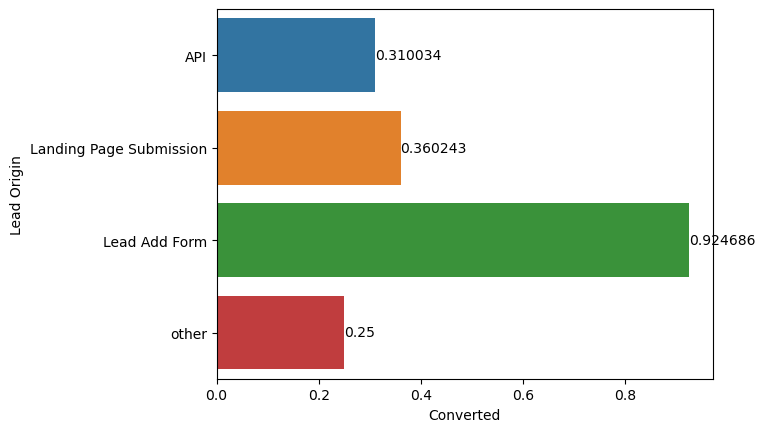



2. Lead Source (weights)
Google              0.315952
Direct Traffic      0.274917
Olark Chat          0.192849
Organic Search      0.120132
Reference           0.058636
Welingak Website    0.015622
Referral Sites      0.012871
other               0.009021
Name: Lead Source, dtype: float64


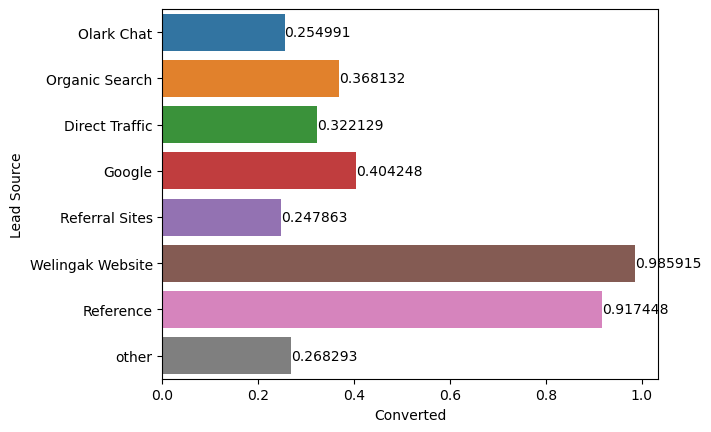



3. Last Activity (weights)
Email Opened                 0.384268
SMS Sent                     0.297800
Olark Chat Conversation      0.106381
Page Visited on Website      0.065347
Converted to Lead            0.047085
Email Bounced                0.035644
Email Link Clicked           0.029043
Form Submitted on Website    0.012541
other                        0.011881
Unreachable                  0.010011
Name: Last Activity, dtype: float64


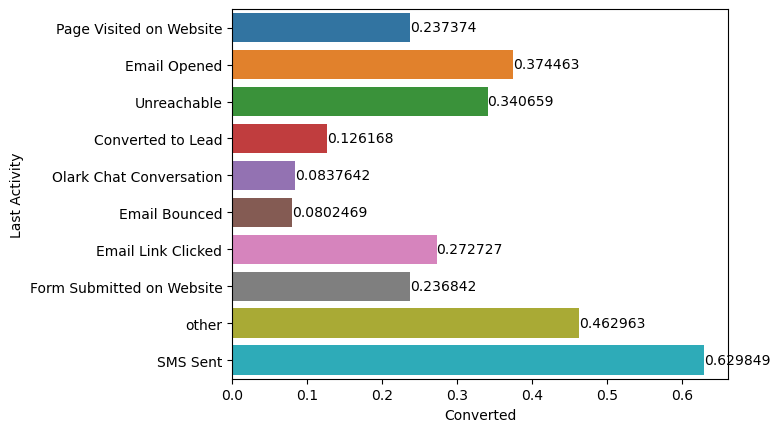



4. Specialization (weights)
Missing                              0.369637
Finance Management                   0.105501
Human Resource Management            0.091309
Marketing Management                 0.091199
Operations Management                0.054785
Business Administration              0.043344
IT Projects Management               0.039604
Supply Chain Management              0.037514
Banking, Investment And Insurance    0.036084
Media and Advertising                0.021782
Travel and Tourism                   0.020902
International Business               0.019032
other                                0.018042
Healthcare Management                0.016832
Hospitality Management               0.012101
E-COMMERCE                           0.011881
Retail Management                    0.010451
Name: Specialization, dtype: float64


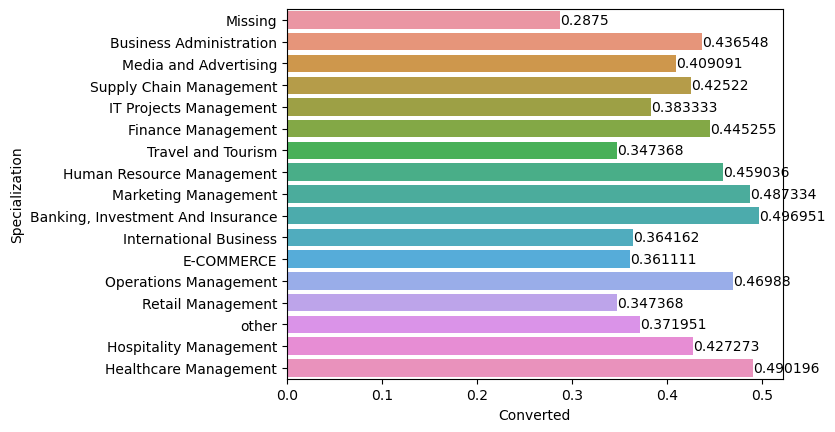



5. What is your current occupation (weights)
Unemployed              0.605941
Missing                 0.291529
Working Professional    0.076348
Student                 0.022772
other                   0.003410
Name: What is your current occupation, dtype: float64


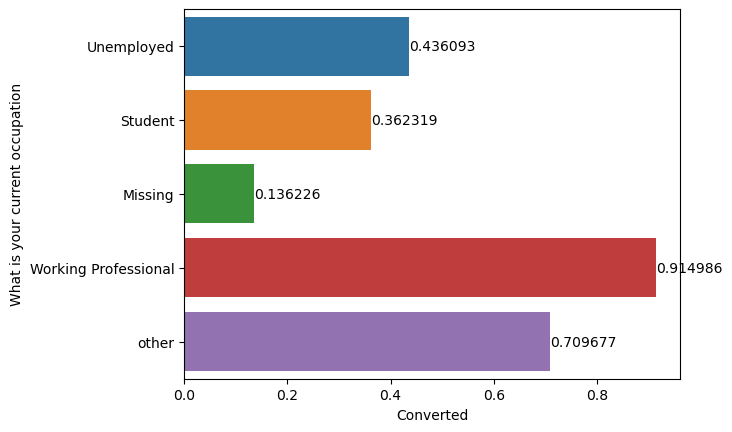



6. A free copy of Mastering The Interview (weights)
No     0.692189
Yes    0.307811
Name: A free copy of Mastering The Interview, dtype: float64


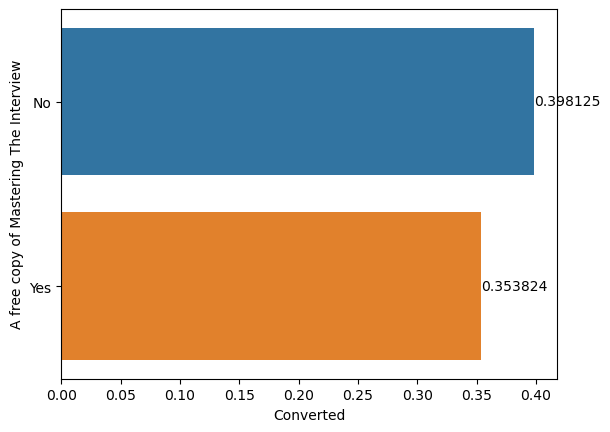



7. Last Notable Activity (weights)
Modified                   0.369747
Email Opened               0.306821
SMS Sent                   0.235754
Page Visited on Website    0.031683
Olark Chat Conversation    0.020022
Email Link Clicked         0.018702
other                      0.017272
Name: Last Notable Activity, dtype: float64


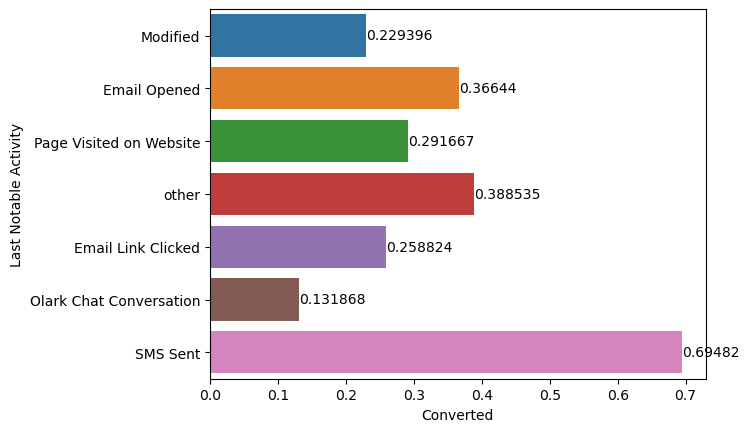

In [38]:
for ind,i in enumerate(cat_cols):
    print('{0}. {1} (weights)'.format(ind+1,i))
    print(leads[i].value_counts(normalize=True))
    ax=sns.barplot(data=leads,x='Converted',y=i,errorbar=None)
    ax.bar_label(ax.containers[0])
    plt.show()
    print('\n')

1. Lead Origin - close to 8% of leads were identified through 'Lead Add Form' and the conversion rate is close to 92%.
2. Lead Source - with 'Welingak Website' as source conversion rate was close to 100% and even 'Reference' as source conversion rate was over 90%.
3. Last Activity - if the last activity performed by the customer was 'SMS Sent', which forms close to 30% of whole leads, the conversion rate was over 62%.
4. Specialization - Marketing Management has close to 49% conversion rate
5. What is your current occupation - for working professional lead conversion rate is over 90%.

# 4. Data Preparation

In [39]:
# Converting 'A free copy of Mastering The Interview', a binary variable (Yes/No) to 1/0
leads['A free copy of Mastering The Interview']=leads['A free copy of Mastering The Interview'].map({'No':0,'Yes':1})

####  Creating dummy features for categorical variables with multiple levels

In [40]:
# list of categorical columns with multiple levels
cat_cols.remove('A free copy of Mastering The Interview')

In [41]:
cat_cols

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Last Notable Activity']

In [42]:
# creating dummies for all the categorical features with multiple levels
dummy = pd.get_dummies(leads[cat_cols])
dummy

,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_other,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Source_other,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_other,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Missing,Specialization_Operations Management,Specialization_Retail Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_other,What is your current occupation_Missing,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_other,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_other
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
9236,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
9237,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
9238,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [43]:
# droping redundant features
dummy=dummy.drop(['Lead Origin_other','Lead Source_other','Last Activity_other','Specialization_Missing',
                  'What is your current occupation_Missing',
                  'Last Notable Activity_other'],axis=1)

#### Adding dummy features to leads data set

In [44]:
leads=pd.concat([leads,dummy],axis=1)

In [45]:
# shape of the data set
leads.shape

(9090, 58)

#### Droppin features for which dummies were created

In [46]:
leads=leads.drop(cat_cols,axis=1)

In [47]:
leads.head()

,Prospect ID,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_other,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0.0,0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,5.0,674,2.5,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,1,2.0,1532,2.0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,1.0,305,1.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,1,2.0,1428,1.0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [48]:
# Putting features to X
X=leads.drop(['Prospect ID','Lead Number','Converted'],axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_other,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0.0,0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,5.0,674,2.5,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,2.0,1532,2.0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
3,1.0,305,1.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,2.0,1428,1.0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [49]:
# Putting target variable to y
y=leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

### Splitting the data into train and test

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=100)

In [51]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_other,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
302,7.0,250,2.33,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6087,0.0,0,0.00,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1033,5.0,470,5.00,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
7656,6.0,352,6.00,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3241,4.0,973,1.33,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [52]:
# shape of the train set
X_train.shape

(6363, 49)

### Feature Scaling

In [53]:
scale_vars=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
scaler=StandardScaler()
X_train[scale_vars]=scaler.fit_transform(X_train[scale_vars])
round(X_train[scale_vars].describe(percentiles=[]),2).T

,count,mean,std,min,50%,max
TotalVisits,6363.0,0.0,1.0,-1.09,-0.05,4.81
Total Time Spent on Website,6363.0,0.0,1.0,-0.89,-0.44,3.28
Page Views Per Visit,6363.0,-0.0,1.0,-1.21,-0.13,3.62


#### Creating a function to build logistic model

In [54]:
# This function takes list of the feature variable names as the input
def Logistic_model(cols):
    # selecting the feature columns
    X_train_features=X_train[cols]
    # adding constant to the X_train features
    X_train_sm=sm.add_constant(X_train_features)
    # Building the model using GLM of statsmodels
    return sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit()

#### Creating a function to check VIFs of features

In [55]:
# This function takes list of the feature variable names as the input
def VIF(cols):
    # creating vif dataframe
    vif = pd.DataFrame()
    X=X_train[cols]
    # adding columns to vif
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

# 5. Model Building

### Building model with all the features

In [56]:
logm=Logistic_model(X_train.columns)

In [57]:
print(logm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6313
Model Family:                Binomial   Df Model:                           49
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2496.3
Date:                Sun, 13 Aug 2023   Deviance:                       4992.6
Time:                        15:33:45   Pearson chi2:                 6.73e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4202
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

- p-value of many feature variables is well over 0.05 making them statistically insignificant

In [58]:
# checking vif of all the features
VIF(X_train.columns)

                                             Features     VIF
5                 Lead Origin_Landing Page Submission  198.99
4                                     Lead Origin_API  146.27
8                                  Lead Source_Google  101.42
7                          Lead Source_Direct Traffic   88.22
9                              Lead Source_Olark Chat   63.52
17                         Last Activity_Email Opened   45.15
6                           Lead Origin_Lead Add Form   41.31
10                         Lead Source_Organic Search   39.60
21                             Last Activity_SMS Sent   36.34
45                     Last Notable Activity_Modified   35.36
44                 Last Notable Activity_Email Opened   34.09
11                              Lead Source_Reference   29.12
48                     Last Notable Activity_SMS Sent   27.40
19              Last Activity_Olark Chat Conversation   13.31
20              Last Activity_Page Visited on Website    9.34
13      

- Multicollinearity of feature variables is checked using VIF
- VIF > 5, indicates high correlation of a feature variable with other feature variables
- VIF of many features is well over 100 indicates presence of severe multicollinearity in the model

## RFE -  automating the feature elimination process

In [59]:
# Running RFE with 15 feature variables as output
rfe=RFE(estimator=LogisticRegression(),n_features_to_select=15)
# fitting the train set variables to RFE
rfe=rfe.fit(X_train,y_train)

In [60]:
# rfe.support_ gives boolean value 'True' only for a feature variable selected through RFE method
# rfe.ranking_ gives ranks from 2 of feature variables not selected through RFE method, and ranking 1 for all features selected through RFE metho
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', False, 25),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 26),
 ('A free copy of Mastering The Interview', False, 32),
 ('Lead Origin_API', False, 33),
 ('Lead Origin_Landing Page Submission', False, 8),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Source_Direct Traffic', False, 21),
 ('Lead Source_Google', False, 31),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 22),
 ('Lead Source_Reference', False, 34),
 ('Lead Source_Referral Sites', False, 35),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 28),
 ('Last Activity_Email Opened', False, 4),
 ('Last Activity_Form Submitted on Website', False, 30),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Page Visited on Website', False, 23),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreachable', Fa

In [61]:
# list of the top 15 feature variables based on RFE method
rfe_cols=X_train.columns[rfe.support_]
rfe_cols

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'What is your current occupation_other',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

### Model 1

In [62]:
# Building the model by fitting the top 15 feature variables using Statsmodels
logm1=Logistic_model(rfe_cols)
# printing the summary of the logistic model
print(logm1.summary())
# checking the presence of multicollinearity among the feature variables
VIF(rfe_cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6347
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2573.9
Date:                Sun, 13 Aug 2023   Deviance:                       5147.9
Time:                        15:33:51   Pearson chi2:                 6.45e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4059
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

- VIF of all the features is less than 5 indicates presence of acceptable level of multicollinearity in the model.
- p-value of 'Last Notable Activity_Olark Chat Conversation' is 0.1 which is well over 0.05, making it statistically insignificant, so this feature is dropped.

## Model 2

In [63]:
# assigning the list of the feature selected through RFE to cols variable  
cols=list(rfe_cols)
# removing the feature'Last Notable Activity_Olark Chat Conversation' from cols
cols.remove('Last Notable Activity_Olark Chat Conversation')

In [64]:
# Building the model by removing 'Last Notable Activity_Olark Chat Conversation' from cols
logm2=Logistic_model(cols)
# printing the summary of the logistic model
print(logm2.summary())
# checking the presence of multicollinearity among the feature variables
VIF(cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6348
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2575.3
Date:                Sun, 13 Aug 2023   Deviance:                       5150.7
Time:                        15:33:52   Pearson chi2:                 6.48e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4056
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

- VIF of all the features is less than 5 indicates presence of acceptable level of multicollinearity in the model.
- p-value of 'Last Notable Activity_Olark Chat Conversation' is 0.07 which is over 0.05, making it statistically insignificant, so this feature is dropped.

## Model 3

In [65]:
# removing the feature 'Last Notable Activity_Email Link Clicked' from cols
cols.remove('Last Notable Activity_Email Link Clicked')

In [66]:
# Building the model by removing 'Last Notable Activity_Email Link Clicked' from cols
logm3=Logistic_model(cols)
# printing the summary of the logistic model
print(logm3.summary())
# checking the presence of multicollinearity among the feature variables
VIF(cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6349
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2577.1
Date:                Sun, 13 Aug 2023   Deviance:                       5154.1
Time:                        15:33:52   Pearson chi2:                 6.47e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4053
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

- VIF of all the features is less than 5 indicates presence of acceptable level of multicollinearity in the model.
- Eventhough 'What is your current occupation_other' is statistically significant, it's weightage is very small in the data set, less than 1%, and is dropped to make the model lighter.

## Model 4

In [67]:
# removing the feature 'What is your current occupation_other' from cols
cols.remove('What is your current occupation_other')

In [68]:
# Building the model by removing 'What is your current occupation_other' from cols
logm4=Logistic_model(cols)
# printing the summary of the logistic model
print(logm4.summary())
# checking the presence of multicollinearity among the feature variables
VIF(cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6350
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2592.5
Date:                Sun, 13 Aug 2023   Deviance:                       5184.9
Time:                        15:33:52   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4024
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

- VIF of all the features is less than 5 indicates presence of acceptable level of multicollinearity in the model
- Eventhough 'What is your current occupation_Student' is statistically significant, it's weightage is very small in the data set, and is dropped to make the model lighter.
- Weightage of 'Lead Source_Welingak Website' is quite small too, but its difference from conversion rate of the data set is huge, so it is not dropped.

## Model 5

In [69]:
# removing the feature 'What is your current occupation_Student' from cols
cols.remove('What is your current occupation_Student')
# Building the model by removing 'What is your current occupation_Student' from cols
logm5=Logistic_model(cols)
# printing the summary of the logistic model
print(logm5.summary())
# checking the presence of multicollinearity among the feature variables
VIF(cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6351
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2603.5
Date:                Sun, 13 Aug 2023   Deviance:                       5207.1
Time:                        15:33:52   Pearson chi2:                 6.57e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4003
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

- VIF of all the features is less than 5 indicates presence of acceptable level of multicollinearity in the model.
- Eventhough 'Last Activity_Converted to Lead' is statistically significant, it is dropped to make the model lighter.

## Model 6

In [70]:
# removing the feature 'Last Activity_Converted to Lead' from cols
cols.remove('Last Activity_Converted to Lead')
# Building the model by removing 'Last Activity_Converted to Lead' from cols
logm6=Logistic_model(cols)
# printing the summary of the logistic model
print(logm6.summary())
# checking the presence of multicollinearity among the feature variables
VIF(cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6352
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2608.1
Date:                Sun, 13 Aug 2023   Deviance:                       5216.2
Time:                        15:33:53   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3994
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

- VIF of all the features is less than 5 indicates presence of acceptable level of multicollinearity in the model.
- p-value of all the features is less than 0.05, which indicates all the features are statistically significant.
- These final 10 model parameters are accepted as the final model parameters.

# 6. Checking the Model Metrics

### Making predictions on the Train set using Model 6

In [71]:
# the probability of conversion of each lead
y_train_pred = logm6.predict(sm.add_constant(X_train[cols]))
y_train_pred[:10]

302     0.079014
6087    0.015230
1033    0.269582
7656    0.478322
3241    0.760597
5738    0.052646
7366    0.034280
3680    0.031141
4170    0.744198
43      0.075031
dtype: float64

### Creating a data frame to make predictions

In [72]:
# Creating the data frame with 'Converted' and 'Converted_Prob' as columns
y_train_pred_final = pd.DataFrame({'Converted':y_train.values,'Converted_Prob':y_train_pred.values})
# adding the column 'Lead ID' to the data frame
y_train_pred_final['Lead ID'] = leads['Lead Number']
y_train_pred_final=y_train_pred_final[['Lead ID','Converted_Prob','Converted']]
y_train_pred_final.head()

,Lead ID,Converted_Prob,Converted
0,660737.0,0.079014,0
1,660728.0,0.015230,0
2,660727.0,0.269582,0
3,660719.0,0.478322,0
4,660681.0,0.760597,1


In [73]:
# adding the column 'predicted' to the data frame with a random cut-off value of 0.5
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.apply(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Lead ID,Converted_Prob,Converted,predicted
0,660737.0,0.079014,0,0
1,660728.0,0.015230,0,0
2,660727.0,0.269582,0,0
3,660719.0,0.478322,0,0
4,660681.0,0.760597,1,1


In [74]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train, y_train_pred_final.predicted)*100)

81.65959453088166


In [75]:
# Let's look at the confusion matrix 
confusion = metrics.confusion_matrix(y_train, y_train_pred_final.predicted )
confusion

array([[3503,  432],
       [ 735, 1693]], dtype=int64)

In [76]:
# Actual/Predicted     not_converted    converted
        # not_converted        3503      432
        # converted            735       1693  

In [77]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [78]:
# Let's see the sensitivity/true positive rate of the logistic regression model
TP / float(TP+FN)*100

69.72817133443164

In [79]:
# Let us calculate specificity
TN / float(TN+FP)*100

89.02160101651843

- accuracy of the model is 81.66% which is a good score.
- sensitivity of the model is 69.73%, which is low, we can miss out on a good chuck of the potential leads.
- specificity of the model is 89.02%, as there is trade-off between sensitivity & specificity, low value of sensitivity has resulted in high value of specificity.

### Plotting the ROC Curve

In [80]:
# creating the fucntion to plot the ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    # drop_intermediate,bool, default=True
    # Whether to drop some suboptimal thresholds which would not appear on a plotted ROC curve. 
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    #  %0.2f Is the format to print just 2 decimals instead of all of them when you print a float
    plt.plot([0, 1], [0, 1],'k--')
    # 'k--'' -> k means black
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or [1 - Specificity]')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    return None

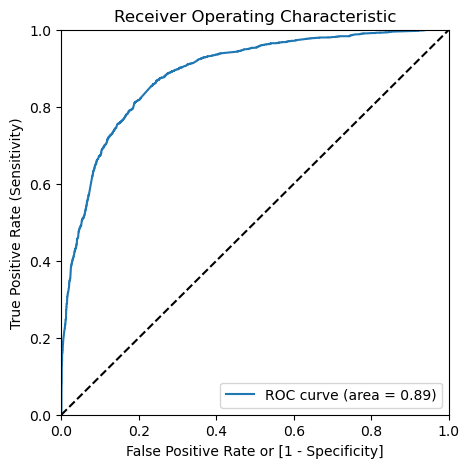

In [81]:
# calling the function to plot the ROC Curve
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

- The value for AUC is 0.89, which is a good value, this indicates the model is working satisfactorily & not just guessing randomly.

# 7. Finding the Optimal Cut-off Point

In [82]:
# making predictions for different cut-off values
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Lead ID,Converted_Prob,Converted,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,660737.0,0.079014,0,0,1,0,0,0,0,0,0,0,0,0
1,660728.0,0.015230,0,0,1,0,0,0,0,0,0,0,0,0
2,660727.0,0.269582,0,0,1,1,1,0,0,0,0,0,0,0
3,660719.0,0.478322,0,0,1,1,1,1,1,0,0,0,0,0
4,660681.0,0.760597,1,1,1,1,1,1,1,1,1,1,0,0


In [83]:
# Creating a data frame to find the optimal cut-off value
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])
    accuracy = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final[i])    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,probability,accuracy,sensitivity,specificity
0.0,0.0,0.381581,1.000000,0.000000
0.1,0.1,0.633349,0.967875,0.426938
0.2,0.2,0.760805,0.911038,0.668107
0.3,0.3,0.794594,0.871087,0.747395
0.4,0.4,0.812667,0.768122,0.840152
0.5,0.5,0.816596,0.697282,0.890216
0.6,0.6,0.807009,0.626442,0.918424
0.7,0.7,0.778249,0.507002,0.945616
0.8,0.8,0.755461,0.410214,0.968488
0.9,0.9,0.714129,0.270593,0.987802


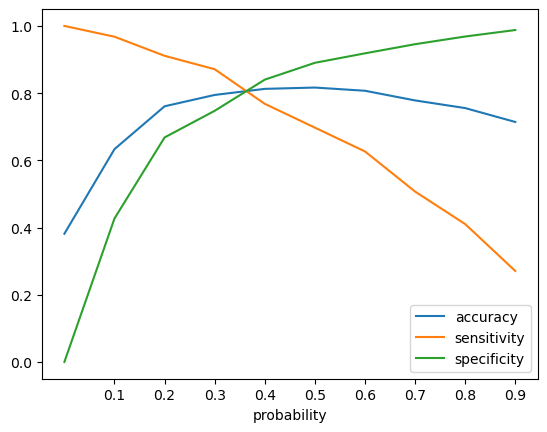

In [84]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
#cutoff_df.plot
plt.xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
plt.show()

#### The above plot show the optimal cut-off value lies in between 0.3 & 0.4

#### Finding the exact value of optimal cut-off point between 0.3 & 0.4

In [85]:
cutoff_df2 = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
y_train_pred_final2=y_train_pred_final
numbers = [0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.4]
for i in numbers:
    y_train_pred_final2[i] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > i else 0)
for i in numbers:
    cm1 = metrics.confusion_matrix(y_train_pred_final2.Converted, y_train_pred_final2[i])
    accuracy = metrics.accuracy_score(y_train_pred_final2.Converted, y_train_pred_final2[i])    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df2.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df2

,probability,accuracy,sensitivity,specificity
0.31,0.31,0.796951,0.868204,0.752986
0.32,0.32,0.798523,0.859143,0.761118
0.33,0.33,0.800094,0.853377,0.767217
0.34,0.34,0.805438,0.820428,0.796188
0.35,0.35,0.808424,0.815486,0.804066
0.36,0.36,0.810310,0.811779,0.809403
0.37,0.37,0.808895,0.793657,0.818297
0.38,0.38,0.811881,0.789127,0.825921
0.39,0.39,0.812038,0.778418,0.832783
0.40,0.40,0.812667,0.768122,0.840152


- The above table shows 0.35/0.36 could be the optimal cut-off value
- In order to reduce missing out on leads, it is necessary to keep false negatives low, so 0.35 is choosen

In [86]:
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.4],axis=1,inplace=True)
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)
# adding "Lead Score" column for each "Lead ID"
y_train_pred_final["Lead Score"]=round(y_train_pred_final.Converted_Prob*100,2)
y_train_pred_final.head()

,Lead ID,Converted_Prob,Converted,predicted,final_predicted,Lead Score
0,660737.0,0.079014,0,0,0,7.90
1,660728.0,0.015230,0,0,0,1.52
2,660727.0,0.269582,0,0,0,26.96
3,660719.0,0.478322,0,0,1,47.83
4,660681.0,0.760597,1,1,1,76.06


- "Lead Score" value is added to each "Lead ID"

In [87]:
# The accuracy of the logistic regression model
round(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)*100,2)

80.84

In [88]:
# confusion_matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [89]:
# The sensitivity of the logistic regression model
round(TP / float(TP+FN)*100,2)

81.55

In [90]:
# The specificity of the logistic regression model
round(TN / float(TN+FP)*100,2)

80.41

#### Let's look at a different set of metrics

#### recall, precision, f1score of the model at the cut-off value of 0.35  

In [91]:
# recall
round(metrics.recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)*100,2)

81.55

- recall score, which is same as sensitiviy, of the model is 81.55

In [92]:
# precision
round(metrics.precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)*100,2)

71.97

- precision score of the model is 71.97

In [93]:
# f1 score
round(metrics.f1_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)*100,2)

76.46

- f1 score of the model is 76.46

# 8. Making predictions on the test set using Model 6

In [94]:
# test set
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_other,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
6906,4.0,1530,2.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1873,2.0,186,2.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
771,7.0,49,7.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4495,4.0,144,4.0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
9061,2.0,1788,2.0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [95]:
# shape of the test set
X_test.shape

(2727, 49)

In [96]:
# Standardizing the numerical variables
scale_vars=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
# transforming the variables using the fit from the train set
X_test[scale_vars]=scaler.transform(X_test[scale_vars])
# stats of the numerical variables
round(X_test[scale_vars].describe(percentiles=[]),2).T

,count,mean,std,min,50%,max
TotalVisits,2727.0,-0.01,1.00,-1.09,-0.05,4.81
Total Time Spent on Website,2727.0,0.00,1.01,-0.89,-0.44,3.16
Page Views Per Visit,2727.0,0.03,1.03,-1.21,-0.13,3.62


In [97]:
# Selecting the features which are present in the final model
X_test = X_test[X_train[cols].columns]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Modified
6906,1.919395,0,0,0,0,0,1,1,0,0
1873,-0.546142,0,0,0,0,0,1,1,0,1
771,-0.797465,0,0,0,0,0,0,1,0,0
4495,-0.623190,0,0,0,0,0,0,1,0,0
9061,2.392690,0,0,0,0,0,0,0,0,1


In [98]:
# adding the constant to the test set, which is a requirement for the statsmodels
X_test_sm = sm.add_constant(X_test)
# Making predictions on the test set using Model 6
y_test_pred = logm6.predict(X_test_sm)

In [99]:
# Creating the data frame with 'Converted' as a column
y_test_df = pd.DataFrame(y_test)
# adding the column 'Converted_Prob' to the data frame
y_test_df['Converted_Prob']=y_test_pred.values
# adding the column 'Lead ID' to the data frame
y_test_df['Lead ID'] = leads['Lead Number']
y_test_df=y_test_df[['Lead ID','Converted_Prob','Converted']]
y_test_df.head()

,Lead ID,Converted_Prob,Converted
6906,596625,0.906413,1
1873,641392,0.236385,0
771,652477,0.137142,0
4495,616581,0.161227,0
9061,580888,0.467129,1


In [100]:
# resetting the index
y_test_df.reset_index(drop=True, inplace=True)
# adding the column 'final_predicted' to the data frame by using the optimal cut-off probability of 0.35
y_test_df['Predicted'] = y_test_df.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)
# Adding 'Lead Score' to each 'Lead ID'
y_test_df["Lead Score"] = round(y_test_df.Converted_Prob*100,2)

In [101]:
y_test_df.head()

,Lead ID,Converted_Prob,Converted,Predicted,Lead Score
0,596625,0.906413,1,1,90.64
1,641392,0.236385,0,0,23.64
2,652477,0.137142,0,0,13.71
3,616581,0.161227,0,0,16.12
4,580888,0.467129,1,1,46.71


### Checking the test set Metrics

In [102]:
# accuracy of the test set
round(metrics.accuracy_score(y_test_df.Converted, y_test_df.Predicted)*100,2)

79.98

In [103]:
# confusion_matrix
confusion2 = metrics.confusion_matrix(y_test_df.Converted, y_test_df.Predicted)
confusion2

array([[1327,  333],
       [ 213,  854]], dtype=int64)

In [104]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [105]:
# The sensitivity of the test set
round(TP / float(TP+FN)*100,2)

80.04

In [106]:
# The specificity of the test set
round(TN / float(TN+FP)*100,2)

79.94

#### recall, precision, f1score of the test set at the cut-off value of 0.35

In [107]:
# recall
round(metrics.recall_score(y_test_df.Converted, y_test_df.Predicted)*100,2)

80.04

In [108]:
# precision
round(metrics.precision_score(y_test_df.Converted, y_test_df.Predicted)*100,2)

71.95

In [109]:
# f1 score
round(metrics.f1_score(y_test_df.Converted, y_test_df.Predicted)*100,2)

75.78

# 9. Conclusion

### a) parameters of the logistic model

In [110]:
params=pd.DataFrame(logm6.params)
params.columns=['Coefficient']
params['odds']=params['Coefficient'].apply(lambda x: np.exp(x))
params['odds']=round(params['odds'],2)
params.sort_values('odds',ascending=False,inplace=True)
params

,Coefficient,odds
Lead Origin_Lead Add Form,3.572736,35.61
What is your current occupation_Working Professional,3.531187,34.16
Lead Source_Welingak Website,2.608567,13.58
Lead Source_Olark Chat,1.264354,3.54
Last Activity_SMS Sent,1.146114,3.15
Total Time Spent on Website,1.090863,2.98
What is your current occupation_Unemployed,1.018824,2.77
Last Notable Activity_Modified,-0.753641,0.47
Last Activity_Olark Chat Conversation,-0.892922,0.41
Last Activity_Email Bounced,-1.723753,0.18


#### interpreting positive coefficient of a parameter with binary values
- "Lead Origin_Lead Add Form" has 35.61 times the odds of the other classes of "Lead Origin", in getting the lead converted.
- "What is your current occupation_Working Professional" has 34.16 times the odds of the other classes of "What is your current occupation", in getting the lead converted.
#### interpreting negative coefficient of a parameter with binary values
- "Last Activity_Email Bounced" is associated with 0.82  or 82% (1 - 0.18) reduction in getting the lead converted.
- "Last Notable Activity_Modified" is associated with 0.53  or 53% (1 - 0.47) reduction in getting the lead converted.
#### interpreting positive coefficient of a parameter with numerical values
- An increase in 1 standard deviation in "Total Time Spent on Website" is associated with 2.98 times increase in the odds of a lead getting converted.

### b) Metrics of the train & test sets

#### train set (Logistic regression model)
- accuracy: 80.84%
- sensitivity: 81.55%
- specificity: 80.41%
#### test set
- accuracy: 79.98%
- sensitivity: 80.04%
- specificity: 79.94%

### c) Lead Score of the Hot Leads

#### Train Set

In [111]:
Hot_Leads_Train=y_train_pred_final[y_train_pred_final.final_predicted==1]
Hot_Leads_Train.sort_values('Lead Score',ascending=False,inplace=True)
Hot_Leads_Train[['Lead ID','Lead Score']]

,Lead ID,Lead Score
4685,614821.0,99.96
781,652314.0,99.93
3387,627713.0,99.89
2807,632798.0,99.88
2731,633445.0,99.88
...,...,...
2541,635315.0,35.19
2351,637076.0,35.18
5392,608483.0,35.14
3636,625590.0,35.11


#### Test Set

In [112]:
Hot_Leads_Test=y_test_df[y_test_df.Predicted==1]
Hot_Leads_Test.sort_values('Lead Score',ascending=False,inplace=True)
Hot_Leads_Test[['Lead ID','Lead Score']]

,Lead ID,Lead Score
2662,627106,99.89
1601,627462,99.81
1093,591536,99.78
484,658648,99.75
33,625862,99.68
...,...,...
1450,654594,35.19
2202,583595,35.09
2149,614845,35.09
2568,602582,35.06
